# Hands-On NLP - Class 1: Foundations of Text Analysis

**Date:** January 9, 2026

**Goal:** This first notebook explores the fundamental questions of NLP:
*   What is a character? (Unicode)
*   What is a word? (Tokenization)
*   How do words behave? (Zipf's Law, Type/Token Ratios)

**Instructions:**
1. Run the cells to see the results.
2. Look for **🚧 TODO:** markers. These are exercises for you.
3. For "Explain" questions, write your answer in the markdown cell below the question.

This notebook is designed to be completed **individually** in class (1h30).

<span style="color:magenta">Student name:</span>

JIN Zhuoyuan

## Setup

In [14]:
import collections
import re
import unicodedata
import os
import zipfile
import urllib.request
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# Setup
tqdm.pandas()
sns.set_style("darkgrid")
sns.set_context("notebook")
pd.set_option("display.precision", 2)



## Download the Stackexchange Dataset provided by EleutherAI

* original Github repository: https://github.com/EleutherAI/stackexchange-dataset
* original data from: https://archive.org/details/stackexchange
* small subset for this class: gerdes.fr/saclay/honlp/texts.zip

In [15]:
# Download and unzip the texts dataset if not already present

DATA_DIR = Path("texts")

if not DATA_DIR.exists():
    print("Downloading texts.zip...")
    url = "https://gerdes.fr/saclay/honlp/texts.zip"
    zip_path = "texts.zip"
    urllib.request.urlretrieve(url, zip_path)

    print("Extracting texts.zip...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(".")

    # Clean up zip file
    os.remove(zip_path)
    print("Done!")

# Verify Data
if not DATA_DIR.exists():
    raise FileNotFoundError(f"Could not find 'texts' directory at {DATA_DIR.absolute()}")

print(f"Data directory: {DATA_DIR.absolute()}")



Data directory: /content/texts


## Part 1: Text as Data (Unicode & Encoding)

Before we process "words", we must handle "characters". Modern text is almost always Unicode (UTF-8).

### 1.1 Exploring Unicode

**🚧 TODO:**
1. Why is UTF-8 the most common encoding on the web? What does UTF-8 stand for?
2. Explore the text_sample below. What do you notice? If you're looking at this in VSCode, why do you see boxes around some characters?

**Answer here:**
1. Because it is backward compatible with ASCII, it's efficient and it can represent all Unicode characters(emoji non-Latin etc)
2. These “A” characters look the same, but they belong to different Unicode blocks and have different code points. Therefore, computers treat them as distinct characters, which may lead to subtle bugs in source code.


In [16]:
# Example string with diversity
text_sample = "Hello! 👋 123 ÿ €ĕŁ茶Ꝣीが€,!≫■✅🤗\u200c\u200e\u3000\xa0\xad AΑАO〇0"

Write a function `analyze_string(text)` that prints the name of each character in the text using `unicodedata.name()`.
Each line should look like this:

```
'a' (U+0061): LATIN SMALL LETTER A
```


In [17]:
def analyze_string(text):
    print(f"Analyzing: {text}")
    for char in text:
        try:
            # 🚧 TODO:
            codepoint = f"U+{ord(char):04X}"
            name = unicodedata.name(char)
        except ValueError:
            name = "no unicode"
        print(f"'{char}' ({codepoint}): {name}")

analyze_string(text_sample)

Analyzing: Hello! 👋 123 ÿ €ĕŁ茶Ꝣीが€,!≫■✅🤗‌‎　 ­ AΑАO〇0
'H' (U+0048): LATIN CAPITAL LETTER H
'e' (U+0065): LATIN SMALL LETTER E
'l' (U+006C): LATIN SMALL LETTER L
'l' (U+006C): LATIN SMALL LETTER L
'o' (U+006F): LATIN SMALL LETTER O
'!' (U+0021): EXCLAMATION MARK
' ' (U+0020): SPACE
'👋' (U+1F44B): WAVING HAND SIGN
' ' (U+0020): SPACE
'1' (U+0031): DIGIT ONE
'2' (U+0032): DIGIT TWO
'3' (U+0033): DIGIT THREE
' ' (U+0020): SPACE
'ÿ' (U+00FF): LATIN SMALL LETTER Y WITH DIAERESIS
' ' (U+0020): SPACE
'€' (U+20AC): EURO SIGN
'ĕ' (U+0115): LATIN SMALL LETTER E WITH BREVE
'Ł' (U+0141): LATIN CAPITAL LETTER L WITH STROKE
'茶' (U+8336): CJK UNIFIED IDEOGRAPH-8336
'Ꝣ' (U+A762): LATIN CAPITAL LETTER VISIGOTHIC Z
'ी' (U+0940): DEVANAGARI VOWEL SIGN II
'が' (U+304C): HIRAGANA LETTER GA
'€' (U+20AC): EURO SIGN
',' (U+002C): COMMA
'!' (U+0021): EXCLAMATION MARK
'≫' (U+226B): MUCH GREATER-THAN
'■' (U+25A0): BLACK SQUARE
'✅' (U+2705): WHITE HEAVY CHECK MARK
'🤗' (U+1F917): HUGGING FACE
'‌' (U+200C): ZERO WIDTH

### 1.2 The Mystery Character

**🚧 TODO:**
Identify the highest-numbered non-Chinese Unicode character in the following string.
What is it called? Where did you find it?

In [18]:
mystery_string = "Hello 🌍! This is a test with some weird chars: ﷽, 🐍, and 🫀."

analyze_string(mystery_string)

# Code to find max explicitly:
# 🚧 TODO:
max_char = max(mystery_string, key=ord)
print(f"\nMax char by code point: {max_char} (U+{ord(max_char):04X})")


Analyzing: Hello 🌍! This is a test with some weird chars: ﷽, 🐍, and 🫀.
'H' (U+0048): LATIN CAPITAL LETTER H
'e' (U+0065): LATIN SMALL LETTER E
'l' (U+006C): LATIN SMALL LETTER L
'l' (U+006C): LATIN SMALL LETTER L
'o' (U+006F): LATIN SMALL LETTER O
' ' (U+0020): SPACE
'🌍' (U+1F30D): EARTH GLOBE EUROPE-AFRICA
'!' (U+0021): EXCLAMATION MARK
' ' (U+0020): SPACE
'T' (U+0054): LATIN CAPITAL LETTER T
'h' (U+0068): LATIN SMALL LETTER H
'i' (U+0069): LATIN SMALL LETTER I
's' (U+0073): LATIN SMALL LETTER S
' ' (U+0020): SPACE
'i' (U+0069): LATIN SMALL LETTER I
's' (U+0073): LATIN SMALL LETTER S
' ' (U+0020): SPACE
'a' (U+0061): LATIN SMALL LETTER A
' ' (U+0020): SPACE
't' (U+0074): LATIN SMALL LETTER T
'e' (U+0065): LATIN SMALL LETTER E
's' (U+0073): LATIN SMALL LETTER S
't' (U+0074): LATIN SMALL LETTER T
' ' (U+0020): SPACE
'w' (U+0077): LATIN SMALL LETTER W
'i' (U+0069): LATIN SMALL LETTER I
't' (U+0074): LATIN SMALL LETTER T
'h' (U+0068): LATIN SMALL LETTER H
' ' (U+0020): SPACE
's' (U+0073):

**Answer:**

The Max character is the Heart emoji 🫀

---

### 1.3 Visual Lookalikes (Homoglyphs)

**🚧 TODO:**
Look at the two groups of three characters in `text_sample` above that look similar.
Run `analyze_string` on them. Why do they have different Unicode code points? How can this be a problem for text processing and internet security?

**Answer:**
Although the characters look visually similar, they come from different Unicode blocks, therefore, have different Unicode code points.


## Part 2: Loading & Visualizing Corpora

We will load text files from the `texts` folder.

In [19]:
CORPORA = ["mythology", "woodworking", "robotics", "hsm", "health", "portuguese"]

corpora_text = {}
stats = []

# 🚧 TODO: Complete the code to load the data
# Create a dictionary `corpora_text` mapping corpus name -> full string content
# And a list `stats` with info per corpus

for corpus in tqdm(CORPORA):
    corpus_path = DATA_DIR / corpus

    texts = []
    files = list(corpus_path.glob("*.txt"))

    for file in files:
        with open(file, "r", encoding="utf-8") as f:
            texts.append(f.read())
    full_text = "\n".join(texts)
    corpora_text[corpus] = full_text

    stats.append({
        "corpus": corpus,
        "files_n": len(files),
        "chars_n": len(full_text)
    })

df = pd.DataFrame(stats).set_index("corpus")
df['text'] = df.index.map(corpora_text)

# df

100%|██████████| 6/6 [00:02<00:00,  2.42it/s]


In [20]:
# df.head(5)

### 2.1 Character, Type, and Token Ratios

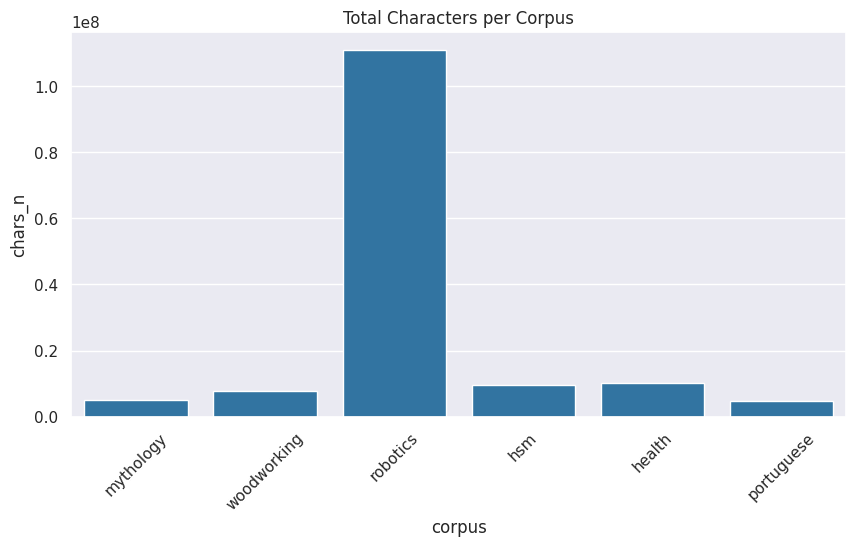

In [21]:
# 🚧 TODO: Visualize character counts per corpus (histogram)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(data=df.reset_index(), x="corpus", y="chars_n")
plt.title("Total Characters per Corpus")
plt.xticks(rotation=45)
plt.show()

**Observation:**
Look at the plot above. Is our dataset balanced?

Answer: No, corpora robotics is much larger than others

*   **No.** Some corpora are much larger than others (e.g., maybe "woodworking" vs "hsm").
*   **Consequence:** Comparing raw counts (like "number of unique characters") directly is unfair. We need normalized metrics.

### 2.2 Character Frequency Analysis

**Why do we do this?**
*   To identify the **language** (Portuguese will have `ã`, `ç`).
*   To spot **artifacts** (encoding errors, weird symbols).
*   To fingerprint the **domain** (Math symbols in Robotics? Emojis in informal text?).

Let's look at the distribution of characters in "mythology".

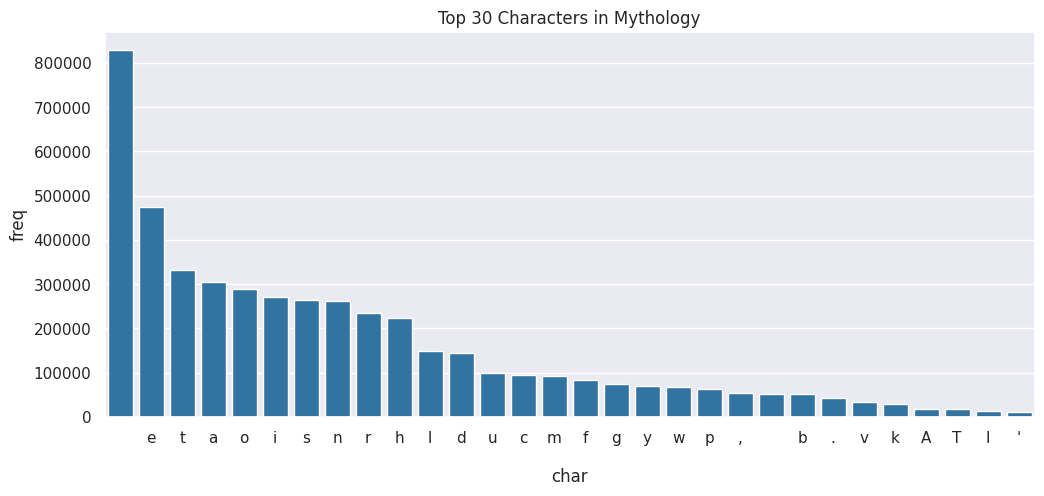

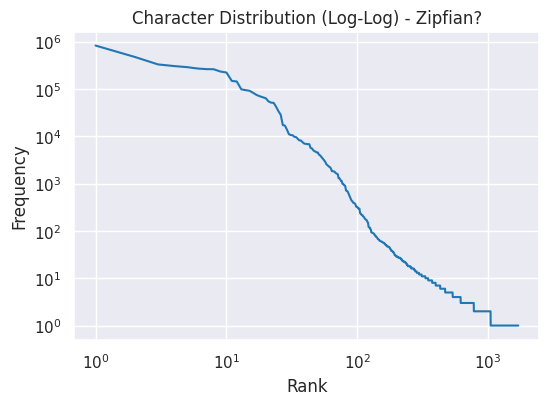

In [22]:
# 🚧 TODO: Create a frequency histogram for the most frequent characters in mythology
# Then create a log-log plot to see if the characters follow Zipf's law.
# Provide your analysis below.

# Solution:
if "mythology" in df.index:
    myth_text = df.loc["mythology", "text"]

    char_counts = Counter(myth_text)
    top30 = char_counts.most_common(30)
    top30_df = pd.DataFrame(top30, columns=["char", "freq"])


    # Plot top 30
    plt.figure(figsize=(12, 5))
    # sns.barplot(... your code here ...)
    sns.barplot(data=top30_df, x="char", y="freq")
    plt.title("Top 30 Characters in Mythology")
    plt.show()

    # Log-Log Plot
    freqs = sorted(char_counts.values(), reverse=True)
    ranks = np.arange(1, len(freqs) + 1)

    plt.figure(figsize=(6, 4))
    # plt.loglog(... your code here ...)
    plt.loglog(ranks, freqs)
    plt.title("Character Distribution (Log-Log) - Zipfian?")
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.show()



**Observation:**
### 🚧 TODO:
... your observations here ...
- The top characters are usually spaces, newlines, common punctuation, and high-frequency letters.
- The log-log plot shows an “approximate straight line + long tail,” indicating a heavy-tailed frequency distribution: a few symbols occur very frequently, while many symbols occur very rarely.

### 2.3 Character Richness (Diversity)

Does every corpus use the same variety of characters?

**Method 1: The Naive Approach**
Calculate `char_types_n` (number of unique characters) and divide by `chars_n`.

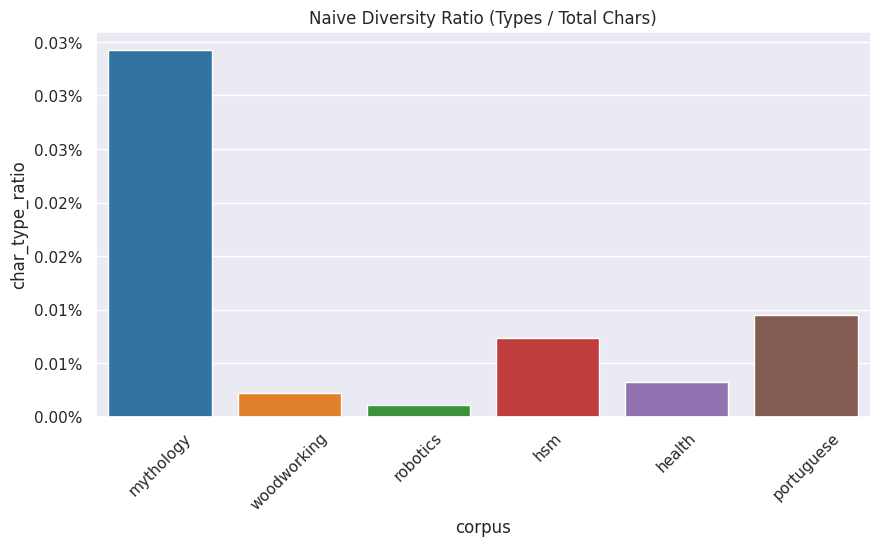

In [23]:
# 🚧 TODO: Add 'char_types_n' and 'char_type_ratio' column
# df["char_types_n"] = ... your code here ...
# df["char_type_ratio"] = ... your code here ...
df["char_types_n"] = df["text"].apply(lambda t: len(set(t)))
df["char_type_ratio"] = df["char_types_n"] / df["chars_n"]


# Plot
plt.figure(figsize=(10, 5))
ax1 = sns.barplot(x=df.index, y="char_type_ratio", data=df, hue="corpus")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=2))
plt.title("Naive Diversity Ratio (Types / Total Chars)")
plt.xticks(rotation=45)
plt.show()

**Wait a minute!** 🛑

Look at the previous results. The smallest corpus often looks "richest".

**The Problem:**
As you read more text, finding *new* characters (or words) becomes harder.
Type-Token Ratio (TTR) naturally decreases as text length increases.
Comparing TTR on corpora of different sizes is **not fair**.

**Method 2: Fixed-Size Window (The Correct Way)**
We should compare the richness on the **same amount of text** (e.g., the first 10,000 characters).

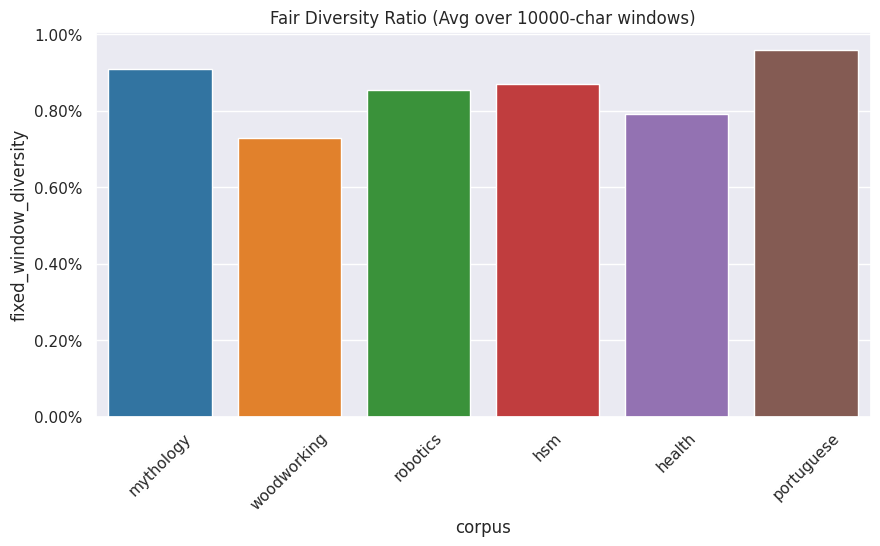

In [24]:
# 🚧 TODO: Calculate diversity averaged over sliding windows
N = 10000

def get_sliding_diversity(text, window_size):
    if len(text) < window_size:
        if len(text) == 0: return 0.0
        return len(set(text)) / len(text)

    # We take non-overlapping chunks for efficiency (Mean TTR)
    ratios = []
    for i in range(0, len(text) - window_size + 1, window_size):
        chunk = text[i:i + window_size]
        ratios.append(len(set(chunk)) / len(chunk))
    return np.mean(ratios)

df["fixed_window_diversity"] = df["text"].apply(lambda t: get_sliding_diversity(t, N))

plt.figure(figsize=(10, 5))
ax2 = sns.barplot(x=df.index, y="fixed_window_diversity", data=df, hue="corpus")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=2))
plt.title(f"Fair Diversity Ratio (Avg over {N}-char windows)")
plt.xticks(rotation=45)
plt.show()

**Question:** Now compare the "Naive" vs "Fixed-Window" plots.
1. Did the ranking change?
Yes. Naive favors shorter corpora; Fixed-Window reduces length bias, so ranks reshuffle.
2. Provide a hand-wavy explanation of the two "diversity winner" corpora. You may have to look into the texts to answer this.

Winners:
portuguese: many diacritics/extended Latin letters → more character types.
robotics: lots of code/math/markup symbols → higher character variety.



## Part 3: Tokenization

**Goal:** Split the text into meaningful units (words).

We will compare methods:
1.  **Simple Split:** `text.split()` (Splits on whitespace).
2.  **Regex Split:** `re.split(r'\W+', text)` (Splits on non-alphanumeric).
    *   *Variant:* `re.split(r'(\W+)', text)` (Keeps delimiters).
3.  **Linguistic Split:** `nltk.word_tokenize` (Smart rules).

In [25]:
sentence = "Wait—what?! I can't believe it's 2026..."
print(f"Original: {sentence}\n")

# Method 1: Simple Split
print("1. text.split():")
print(sentence.split())
# Problem: Punctuation sticks to words ("2026..." is one token)

# Method 2a: Regex Split (\W+) - eats punctuation
print("\n2a. Regex split (\W+):")
print(re.split(r'\W+', sentence))
# Problem: "can't" becomes "can", "t". Punctuation is gone.

# Method 2b: Regex Split with Capturing Group ((\W+)) - keeps punctuation
print("\n2b. Regex split with capturing ((\W+)):")
# By wrapping the separator pattern in parentheses, split() returns the separators too!
print(re.split(r'(\W+)', sentence))
# Better: We keep the punctuation, but it's treated as separate tokens.

# Method 3: NLTK
print("\n3. NLTK:")
try:
    print(nltk.word_tokenize(sentence))
except LookupError:
    nltk.download('punkt_tab')
    print(nltk.word_tokenize(sentence))
# Advantage: "n't" is handled, punctuation is preserved as separate tokens.

Original: Wait—what?! I can't believe it's 2026...

1. text.split():
['Wait—what?!', 'I', "can't", 'believe', "it's", '2026...']

2a. Regex split (\W+):
['Wait', 'what', 'I', 'can', 't', 'believe', 'it', 's', '2026', '']

2b. Regex split with capturing ((\W+)):
['Wait', '—', 'what', '?! ', 'I', ' ', 'can', "'", 't', ' ', 'believe', ' ', 'it', "'", 's', ' ', '2026', '...', '']

3. NLTK:
['Wait—what', '?', '!', 'I', 'ca', "n't", 'believe', 'it', "'s", '2026', '...']


<>:10: SyntaxWarning: invalid escape sequence '\W'
<>:15: SyntaxWarning: invalid escape sequence '\W'
<>:10: SyntaxWarning: invalid escape sequence '\W'
<>:15: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-2209756966.py:10: SyntaxWarning: invalid escape sequence '\W'
  print("\n2a. Regex split (\W+):")
/tmp/ipython-input-2209756966.py:15: SyntaxWarning: invalid escape sequence '\W'
  print("\n2b. Regex split with capturing ((\W+)):")


In [26]:
!pip install nltk

### 🚧 TODO:
**Conclusion:**
*   **Split** ... your observations here ...
*   **Regex** ... your observations here ...
*   **NLTK** (and Spacy) ... your observations here ...

### 3.1 Subword Tokenization (BPE)

Large Language Models use **Byte-Pair Encoding (BPE)** to fix the "Out Of Vocabulary" (OOV) problem.

**The Goal:** Algorithmically find the best subwords to represent a text.

**Step 1: Preparation**
We start with a raw string, tokenize it into words, and then split each word into characters.
We append `</w>` to the end of each word to mark the boundary.

In [27]:
# We choose invariant roots (no spelling changes) to show clean merges.
# walk: 4 forms * 3 = 12 times. jump: 12 times.
# suffixes: ing, s, ed appear 6 times each.
# Result: 'walk' and 'jump' should become tokens, then suffixes attach.
raw_text = "walk walking walks walked " * 4 + "jump jumping jumps jumped " * 3

def get_vocab(text):
    vocab = collections.defaultdict(int)
    # Use regex to split words and keep punctuation separate
    words = re.findall(r"\w+|[^\w\s]", text)
    for word in words:
        # Add spaces between chars and </w> at the end
        vocab[' '.join(list(word)) + ' </w>'] += 1
    return vocab

vocab = get_vocab(raw_text)
print("Initial Vocab:", vocab)

Initial Vocab: defaultdict(<class 'int'>, {'w a l k </w>': 4, 'w a l k i n g </w>': 4, 'w a l k s </w>': 4, 'w a l k e d </w>': 4, 'j u m p </w>': 3, 'j u m p i n g </w>': 3, 'j u m p s </w>': 3, 'j u m p e d </w>': 3})


**Step 2: Find the Best Pair**

**🚧 TODO 1:** Write `get_stats(vocab)` to find one of the most frequent pairs of adjacent symbols.

In [28]:
def get_stats(vocab):
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i], symbols[i+1]] += freq
    return pairs

pairs_step1 = get_stats(vocab)
best_pair = max(pairs_step1, key=pairs_step1.get)
print(f"On of the most frequent pair: {best_pair} (Count: {pairs_step1[best_pair]})")

On of the most frequent pair: ('w', 'a') (Count: 16)


**Step 3: Merge and Iterate**

**🚧 TODO 2:** Write `merge_vocab(pair, v_in)` and run a loop for **N merges**.

In [29]:
def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

# 🚧 TODO: Run 12 merges to see meaningful subwords
current_vocab = vocab.copy()
print("Starting BPE Merges...\n")

steps_log = []

for i in range(12):
    pairs_iter = get_stats(current_vocab)
    if not pairs_iter:
        break
    best_iter = max(pairs_iter, key=pairs_iter.get)
    current_vocab = merge_vocab(best_iter, current_vocab)
    steps_log.append(f"Step {i+1}: Merged {best_iter}")
    print(f"Step {i+1}: Merged {best_iter}")

print("\nResulting Vocabulary:")
# Display nicely
vocab_table = [{"Tokenized Word": k, "Frequency": v} for k, v in current_vocab.items()]
print(pd.DataFrame(vocab_table))

Starting BPE Merges...

Step 1: Merged ('w', 'a')
Step 2: Merged ('wa', 'l')
Step 3: Merged ('wal', 'k')
Step 4: Merged ('j', 'u')
Step 5: Merged ('ju', 'm')
Step 6: Merged ('jum', 'p')
Step 7: Merged ('i', 'n')
Step 8: Merged ('in', 'g')
Step 9: Merged ('ing', '</w>')
Step 10: Merged ('s', '</w>')
Step 11: Merged ('e', 'd')
Step 12: Merged ('ed', '</w>')

Resulting Vocabulary:
  Tokenized Word  Frequency
0      walk </w>          4
1   walk ing</w>          4
2     walk s</w>          4
3    walk ed</w>          4
4      jump </w>          3
5   jump ing</w>          3
6     jump s</w>          3
7    jump ed</w>          3


**Step 4: Real World Example**

**🚧 TODO 3:** Train BPE on the 'woodworking' corpus!
1. Build initial vocab from `woodworking` text (first 10k chars).
2. Run 100 merges.
3. Show some words that are ONE token (e.g. "wood") vs words that are SPLIT (e.g. "un-believ-able").

In [30]:
# 1. Get Text
train_text = df.loc["woodworking", "text"][:100000] # Small subset for speed

# 2. Build Vocab
wood_vocab = get_vocab(train_text)

# 3. Train (2000 merges)
for _i in range(2000):
    pairs_train = get_stats(wood_vocab)
    if not pairs_train: break
    best_train = max(pairs_train, key=pairs_train.get)
    wood_vocab = merge_vocab(best_train, wood_vocab)

# 4. Analysis
print("Training done. Analyzing results...")
results = []

for word_seq in wood_vocab:
    wood_tokens = word_seq.split()
    original_word = "".join(wood_tokens).replace("</w>", "")
    # A word is a "Full Token" if it's a single subword (+ end marker)
    # i.e., either ['word</w>'] or ['X', '</w>']
    is_full_token = (len(wood_tokens) == 1) or (len(wood_tokens) == 2 and wood_tokens[-1] == '</w>')
    if is_full_token:
        results.append({"Word": original_word, "Type": "Full Token", "Sequence": str(wood_tokens)})
    else:
         results.append({"Word": original_word, "Type": "Split", "Sequence": str(wood_tokens)})

df_results = pd.DataFrame(results)

print(f"\nAnalysis ({len(results)} total words):")

print("\n--- Examples of Full Tokens (Learned) ---")
print(df_results[df_results["Type"] == "Full Token"].head(10))

print("\n--- Examples of Split Words (Morphology/Rare) ---")
print(df_results[df_results["Type"] == "Split"].head(10))

print(f"\n--- Vocabulary Statistics ---")
print(f"Total unique words in corpus: {len(results)}")
print(f"Full Tokens (single subword): {len(df_results[df_results['Type'] == 'Full Token'])}")
print(f"Split Words (multiple subwords): {len(df_results[df_results['Type'] == 'Split'])}")


Training done. Analyzing results...

Analysis (3192 total words):

--- Examples of Full Tokens (Learned) ---
        Word        Type          Sequence
0          Q  Full Token         ['Q</w>']
1          :  Full Token         [':</w>']
3         vs  Full Token        ['vs</w>']
5       Brad  Full Token      ['Brad</w>']
8          I  Full Token         ['I</w>']
9         do  Full Token        ['do</w>']
10      wood  Full Token      ['wood</w>']
11  projects  Full Token  ['projects</w>']
12      from  Full Token      ['from</w>']
13      time  Full Token      ['time</w>']

--- Examples of Split Words (Morphology/Rare) ---
          Word   Type                        Sequence
2    Pneumatic  Split           ['P', 'neumatic</w>']
4     Electric  Split        ['E', 'l', 'ectric</w>']
6         Nail  Split                ['N', 'ail</w>']
7          Gun  Split             ['G', 'u', 'n</w>']
31      buying  Split              ['bu', 'ying</w>']
36      Garage  Split              ['G', 'a

## Part 4: Token Statistics (Zipf's Law)

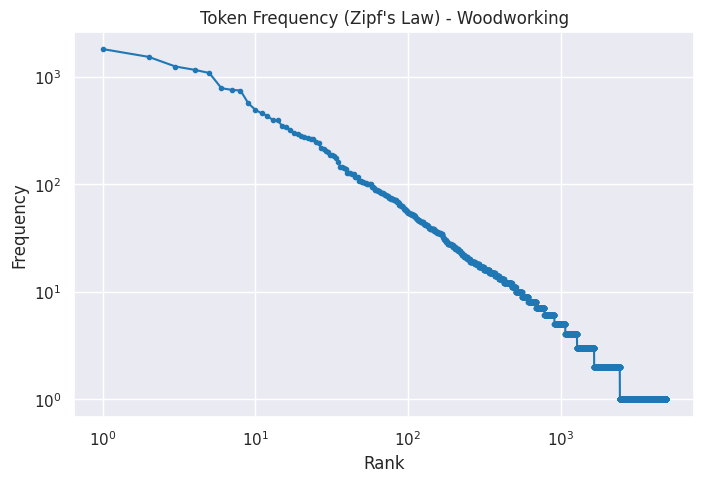

In [31]:
# Use NLTK to tokenize 'woodworking'
wood_text = df.loc["woodworking", "text"]

# 🚧 TODO: Tokenize (you can limit the size)
tokens = nltk.word_tokenize(wood_text[:200000])

# 🚧 TODO: Plot Zipf
counts = Counter(tokens)
freqs = sorted(counts.values(), reverse=True)

plt.figure(figsize=(8, 5))
plt.loglog(range(1, len(freqs)+1), freqs, marker=".")
plt.title("Token Frequency (Zipf's Law) - Woodworking")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.show()

## Part 5: Conclusion

You have successfully explored the atomic units of NLP!

**🎉 CONGRATULATIONS! 🎉**

You survived Unicode (barely), tamed the Tokenizers, and validated Zipf's Law without needing a lawyer!

Go treat yourself to a `\u1F355`!

One last TODO: How to find out what to get?

In [33]:
#this looks easy:
print("\u1F355")
# but wait: it doesn't show what to get:
# Why? Python has two types of Unicode escape sequences:

# 1. \uXXXX (4 digits, 16-bit) -> For Basic Multilingual Plane (BMP) only.
#    "\u1F35" is read as 'ὑ' (Greek Dasia), followed by the literal "5".
# 2. \UXXXXXXXX (8 digits, 32-bit) -> For any Unicode character (including Emoji).
# and \u1F355 requires 8 digits.
print("\U0001F355")

# 3. By Name
print("\N{CUCUMBER}") # that's good for health but not the right name of the treat.
# TODO: correct it to the right treat to get now. But how to find the name of \U0001F355?

# How to find the name?
treat_char = "\U0001F355"
print(f"Name of {treat_char} is: {unicodedata.name(treat_char)}")

ἵ5
🍕
🥒
Name of 🍕 is: SLICE OF PIZZA
